In [1]:
import os
import re
from typing import List, Tuple
import json
import warnings
from datetime import date
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("dark_background")
sns.set_theme(style="darkgrid")

%matplotlib inline

PLOT_SIZE_X = 30
PLOT_SIZE_Y = 15
sns.set(rc={'figure.figsize':(PLOT_SIZE_X, PLOT_SIZE_Y)})

In [2]:
################################################
## Used for collecting lyric data from Genius ##
################################################
# import lyricsgenius

# def clean_lyrics(text: str):
#     return " ".join(text.split("\n")[1:])

# def split_text_into_languages(text: str) -> Tuple[List[str], List[str]]:
#     """
#     Splits a mixed-language text into separate lists of English and Korean words.

#     Args:
#         text (str): The input mixed-language (Korean and English) text.

#     Returns:
#         Tuple[List[str], List[str]]: A tuple containing two lists of words,
#         where the first list contains English words and the second list contains Korean words.
#     """
#     english_words = re.findall(r'\b[a-zA-Z]+\b', text)
#     korean_words = re.findall(r'\b[가-힣]+\b', text)
#     return english_words, korean_words

# token = ""
# genius = lyricsgenius.Genius(token)
# genius.remove_section_headers = True # Remove section headers (e.g. [Chorus]) from lyrics when searching
# genius.skip_non_songs = True # Include hits thought to be non-songs (e.g. track lists)
# genius.excluded_terms = ["(Remix)", "(Live)", "(Cover)"] # Exclude songs with these words in their title

# artists = [
#     "NewJeans",
#     "BTS",
#     "(G)I-DLE",
#     "FIFTY FIFTY",
#     "AESPA",
#     "BLACKPINK",
#     "TWICE",
#     "Enhyphen",
#     "Stray Kids",
#     "TOMORROW X TOGETHER"
# ]

# data = {}
# for artist in artists:
#     data[artist] = {}
#     songs = genius.search_artist(artist, sort="title").songs
#     for song in songs:
#         print(f"Parsing {song} by {artist}")
#         title = song.title
#         eng_words, kor_words = split_text_into_languages(
#             clean_lyrics(song.lyrics)
#         )
#         data[artist][title] = {
#             "Total English Words": len(eng_words),
#             "Total Korean Words": len(kor_words)
#         }
# df = pd.DataFrame.from_dict({(i,j): data[i][j] 
#                            for i in data.keys() 
#                            for j in data[i].keys()},
#                        orient='index').reset_index()
# df = df.rename(columns={"level_0":"Artist","level_1":"Song Name"})
# df.to_csv("data/language_distribution_data.csv", index=False)

In [3]:
#########################################################################
## Used for collecting lyric data from the Billboard Hot 100 2016-2023 ##
########################################################################
# import billboard

# data = {
#     "year":[],
#     "month":[],
#     "artist":[],
#     "title":[],
#     "weeks":[],
#     "rank":[]
# }

# for year in range(2016,2024):
#     print(year)
#     for month in range(1, 13):
#         print("\t", month)
#         m = f'0{month}' if month < 10 else month
#         chart = billboard.ChartData('hot-100', date=f'{year}-{m}-01')
#         for song in range(0,100):
#             s = chart[song]
#             data["year"].append(year)
#             data["month"].append(month)
#             data["artist"].append(s.artist)
#             data["title"].append(s.title)
#             data["weeks"].append(s.weeks)
#             data["rank"].append(song)

# pd.DataFrame(data).to_csv("data/billboard_ranking_2016_to_2023.csv",index=False)

In [4]:
df = pd.read_csv("data/language_distribution_data.csv")
df = df[~df["Song Name"].str.contains("Japanese")]
df["Total Words"] = df["Total English Words"] + df["Total Korean Words"]
df["% English"] = (df["Total English Words"] / df["Total Words"]) * 100
df["% Korean"] = (df["Total Korean Words"] / df["Total Words"]) * 100
df.describe()

,Total English Words,Total Korean Words,Total Words,% English,% Korean
count,814.000000,814.000000,814.000000,814.000000,814.000000
mean,166.058968,138.144963,304.203931,56.879005,43.120995
std,115.454699,99.098749,130.553313,28.974205,28.974205
min,3.000000,0.000000,3.000000,1.298701,0.000000
25%,82.250000,62.250000,227.250000,34.611883,20.371960
50%,150.000000,145.000000,313.000000,52.663095,47.336905
75%,223.000000,201.000000,383.000000,79.628040,65.388117
max,1020.000000,543.000000,1283.000000,100.000000,98.701299


In [5]:
df.groupby("Artist").head(2)

,Artist,Song Name,Total English Words,Total Korean Words,Total Words,% English,% Korean
0,(G)I-DLE,싫다고 말해 (Put It Straight),12,180,192,6.250000,93.750000
1,(G)I-DLE,싫다고 말해 (Put It Straight) [Nightmare Version],12,226,238,5.042017,94.957983
59,AESPA,Forever (약속),40,150,190,21.052632,78.947368
60,AESPA,We Go,87,167,254,34.251969,65.748031
85,BLACKPINK,雪の華 (Yukino Hana) / JISOO (BLACKPINK ARENA TOU...,11,0,11,100.000000,0.000000
86,BLACKPINK,아니길 (Hope Not),44,150,194,22.680412,77.319588
125,BTS,OUTRO : The Journey,3,0,3,100.000000,0.000000
126,BTS,Interlude: 뭐해 (What Are You Doing Now),4,3,7,57.142857,42.857143
330,Enhyphen,가족송 (Family Song),10,82,92,10.869565,89.130435
331,Enhyphen,Flicker,17,189,206,8.252427,91.747573


<Axes: xlabel='Artist', ylabel='Number of Songs'>

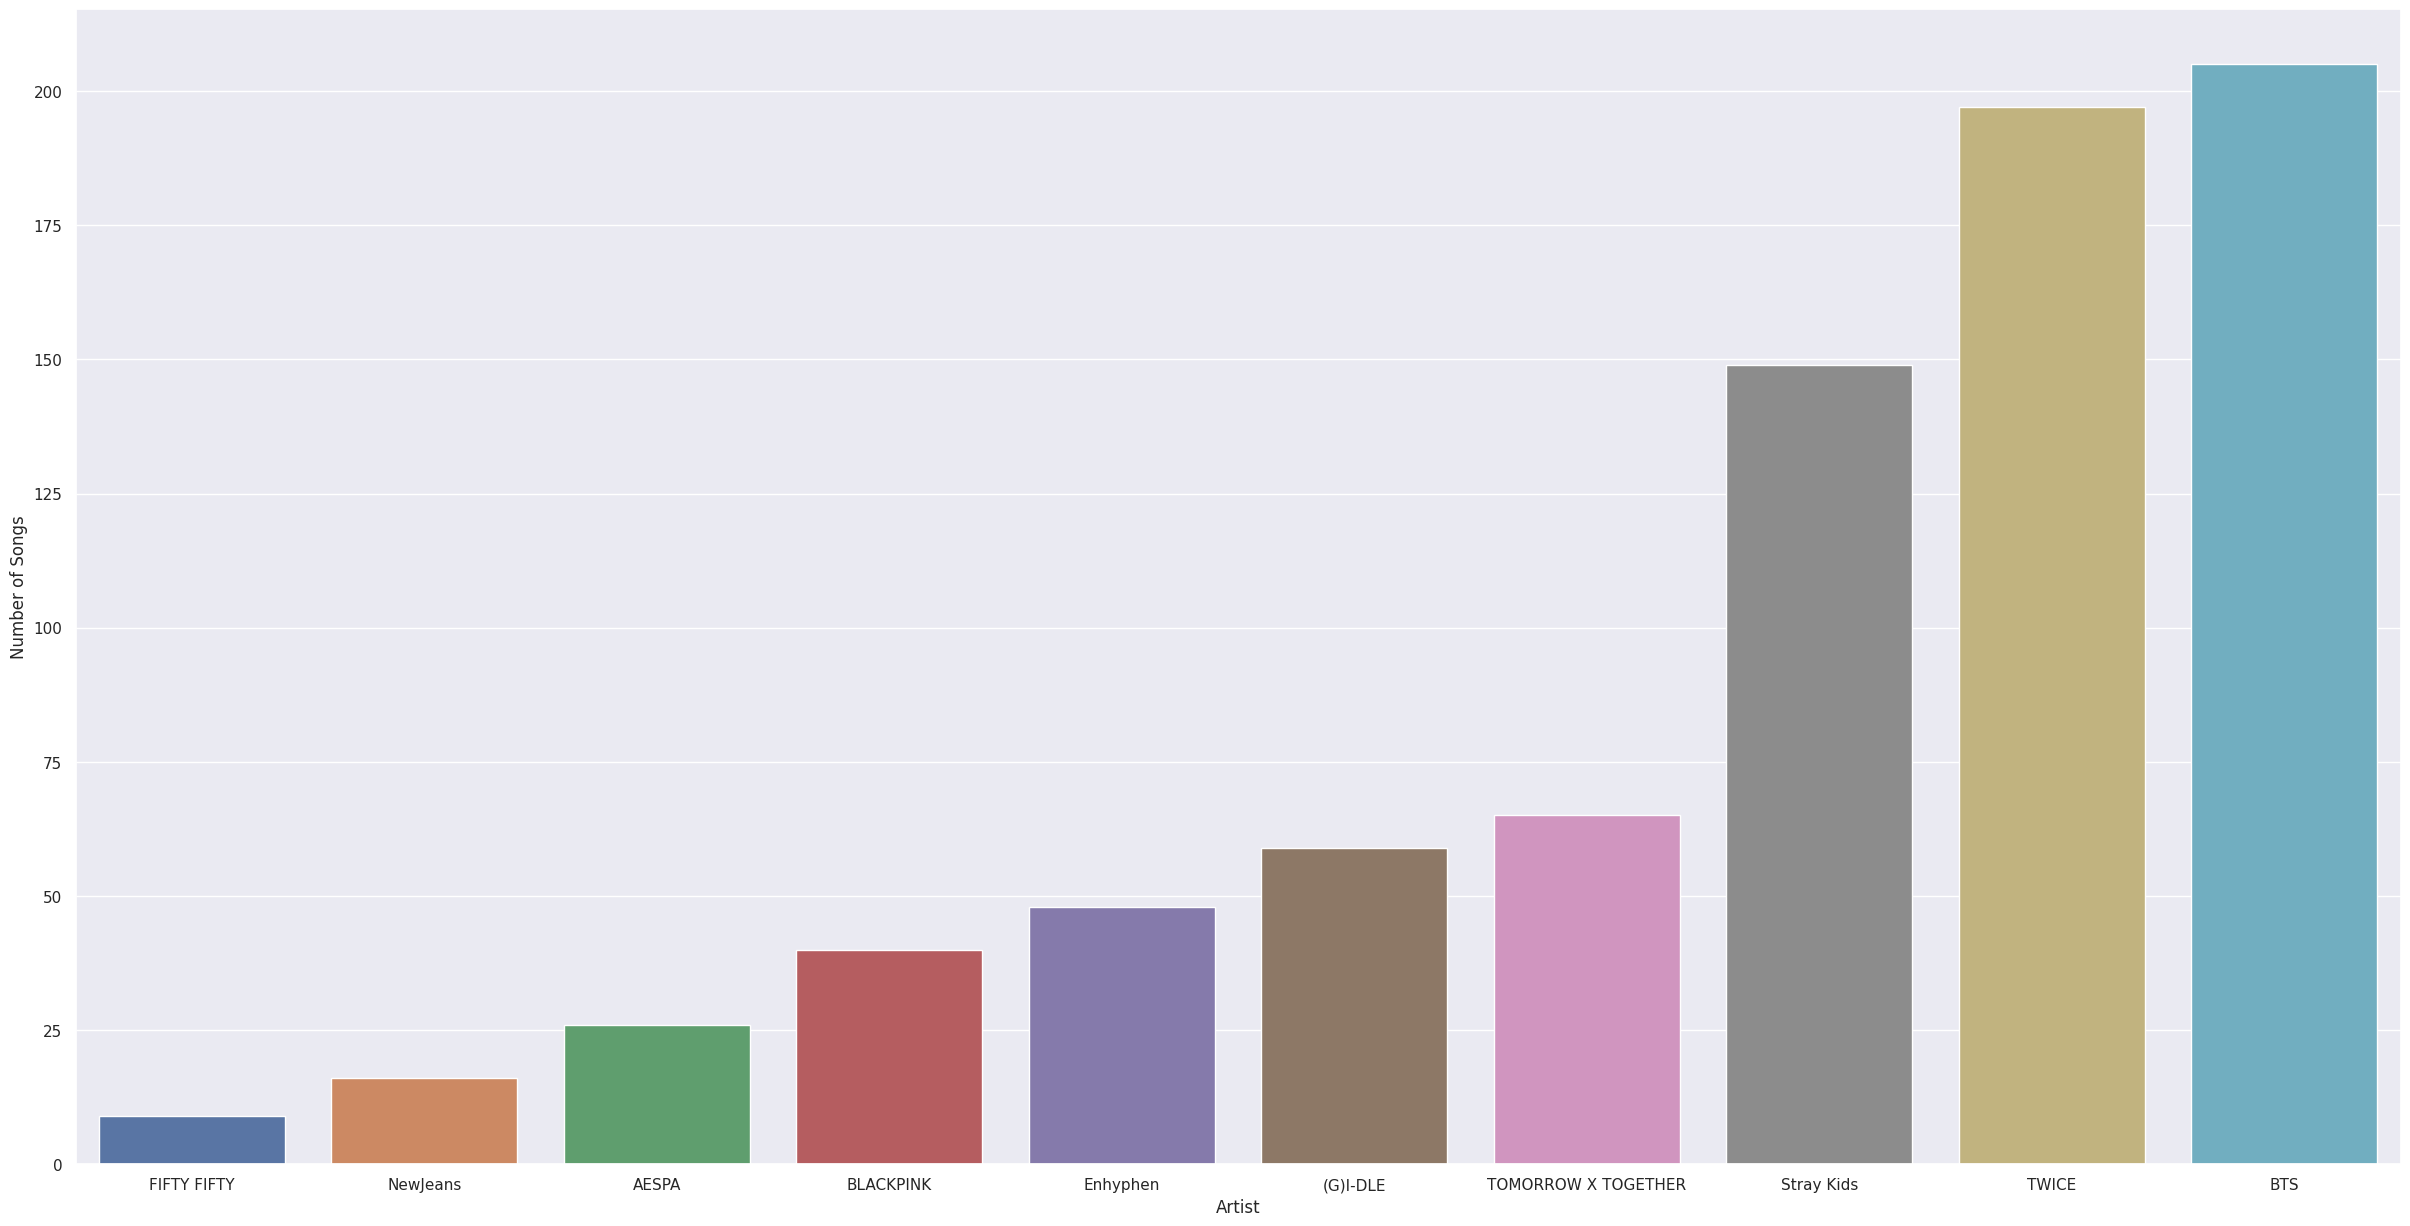

In [6]:
sub = df.groupby("Artist").count().reset_index()
sub = sub.rename(columns={"Song Name" : "Number of Songs"})
sns.barplot(
    data=sub.sort_values("Number of Songs"),
    x="Artist",
    y="Number of Songs",
)

<Axes: xlabel='Artist', ylabel='Total'>

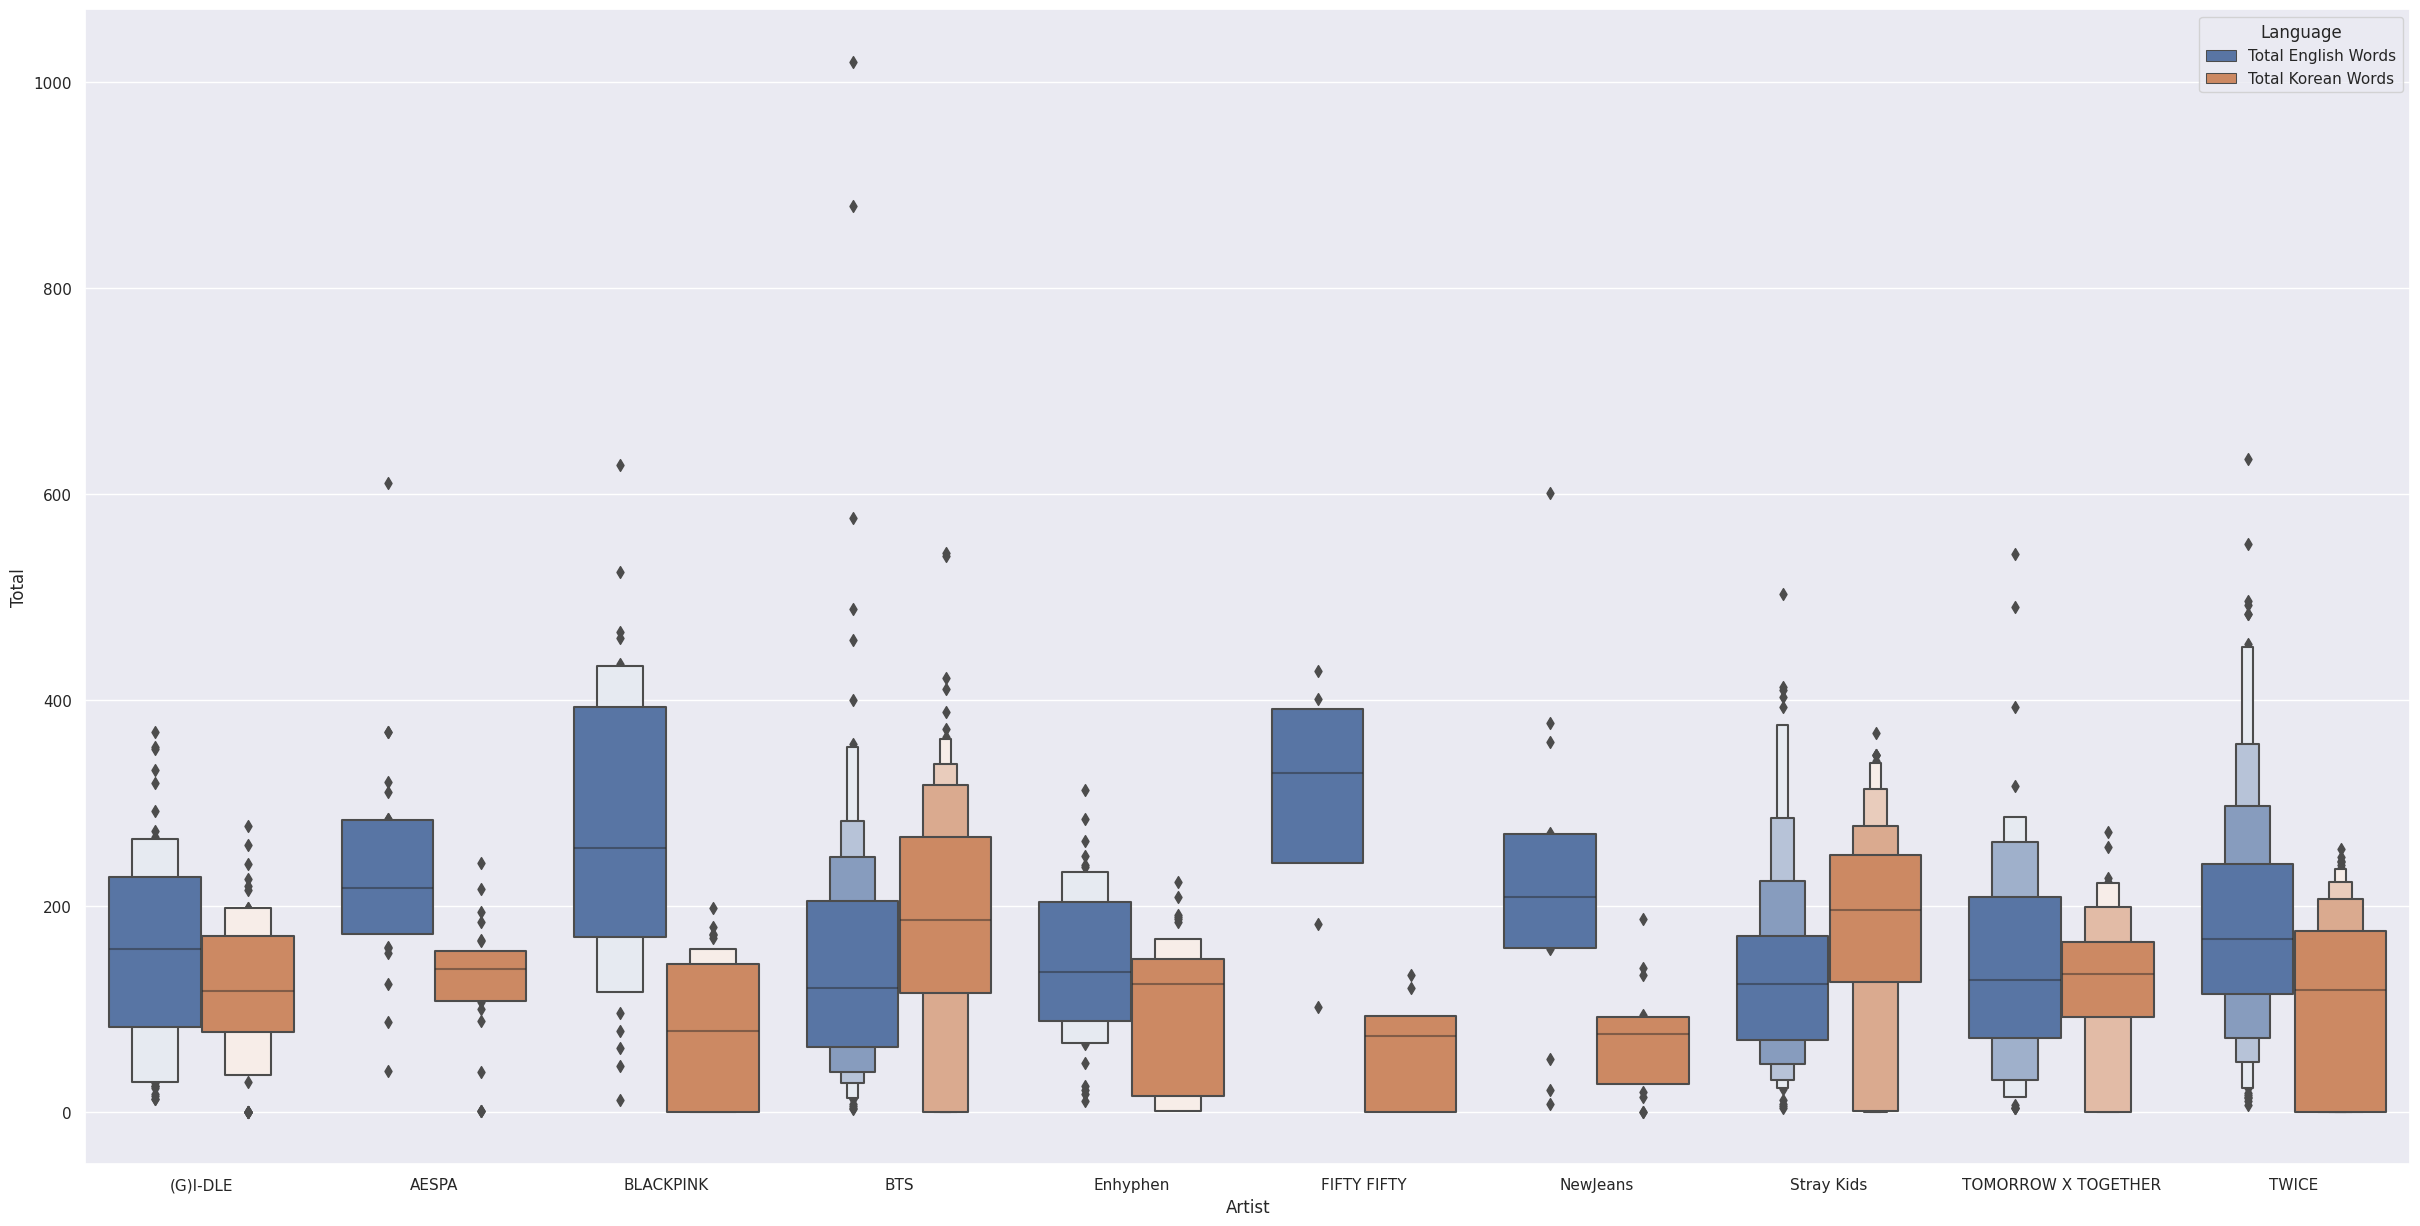

In [7]:
sub = df.set_index("Artist")
sub = sub.melt(
    value_vars=["Total English Words", "Total Korean Words"],
    var_name="Language",
    value_name="Total",
    ignore_index=False
).reset_index()
sns.boxenplot(
    data=sub,
    x="Artist",
    y="Total",
    hue="Language"
)

In [8]:
g_search_df = pd.read_csv("data/google_analytics_group_search_data.csv")
g_search_df = g_search_df.rename(columns={col: col[:col.index(":")] if ":" in col else col for col in g_search_df.columns})

<Axes: xlabel='Month', ylabel='Popularity'>

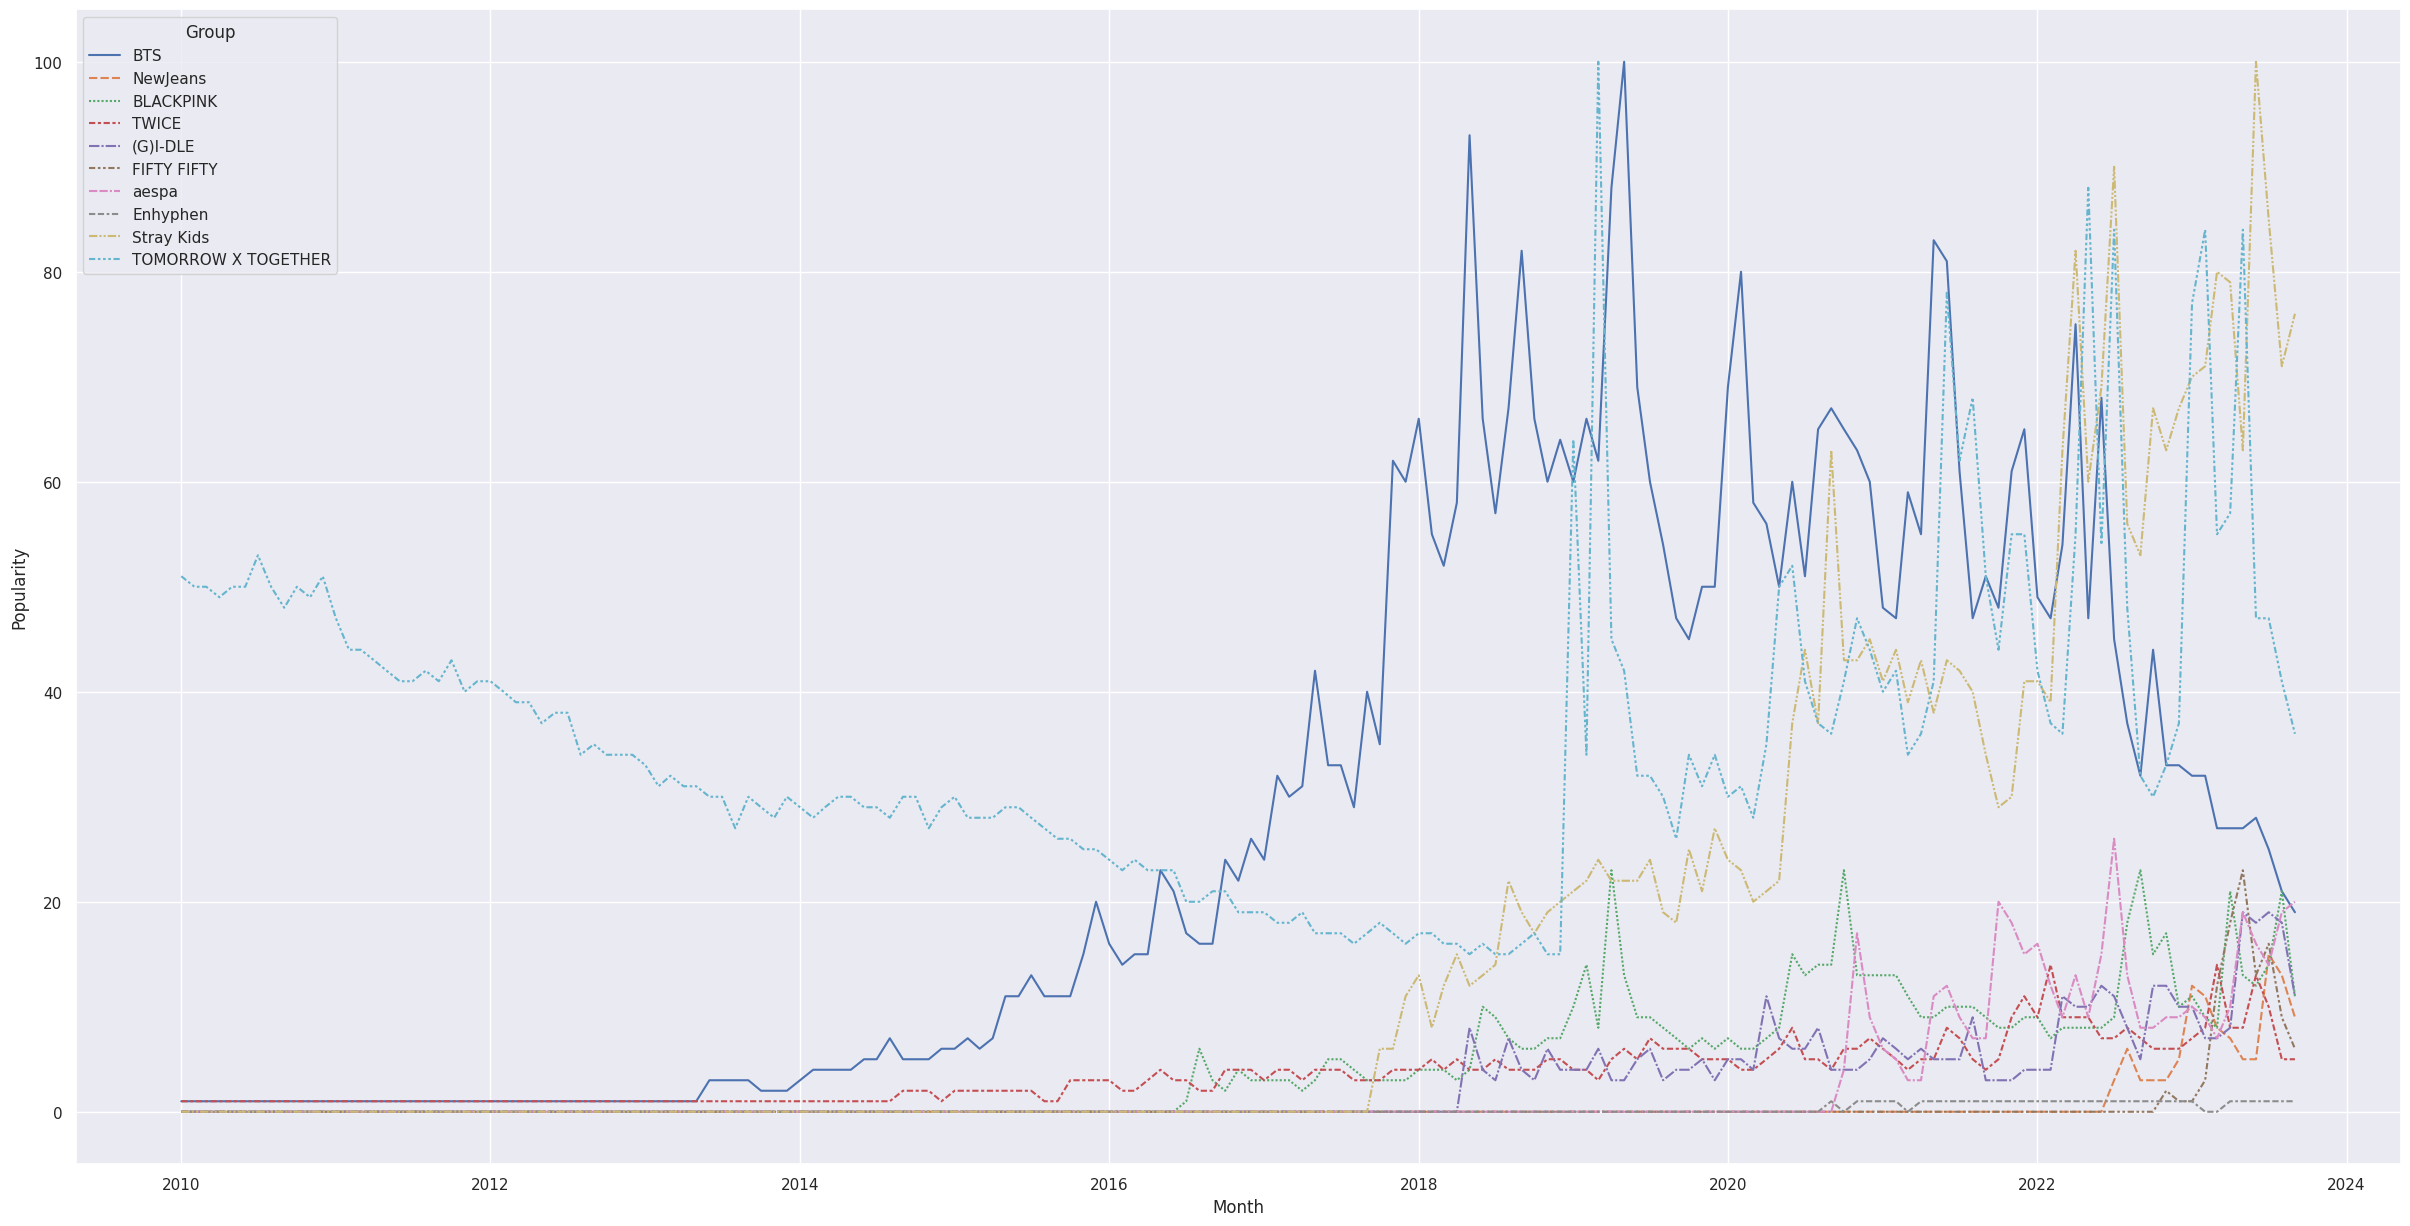

In [9]:
temp = g_search_df.set_index("Month").drop(columns=["K-pop"])
temp = pd.melt(
    temp,
    value_vars=temp.columns,
    ignore_index=False,
    var_name="Group",
    value_name="Popularity"
).reset_index()
temp.loc[temp["Popularity"] == "<1", "Popularity"] = 0
temp["Month"] = pd.to_datetime(temp["Month"])
temp = temp.astype({
    "Group" : str,
    "Popularity" : int
})
sns.lineplot(
    data=temp,
    x="Month",
    y="Popularity",
    hue="Group",
    style="Group"
)

In [10]:
billboard_df = pd.read_csv("data/billboard_ranking_2016_to_2023.csv")
ym = []
for y, m in zip(billboard_df["year"], billboard_df["month"]):
    ym.append(date(y, m, 1))
billboard_df["date"] = ym

In [11]:
group_appearances = {}
for group in temp["Group"].unique():
    group_appearances[group] = billboard_df[billboard_df["artist"].str.contains(group)]
    group_appearances[group]["group"] = group

Text(0.5, 1.0, 'Number of songs a group has had on the Billboard Hot 100')

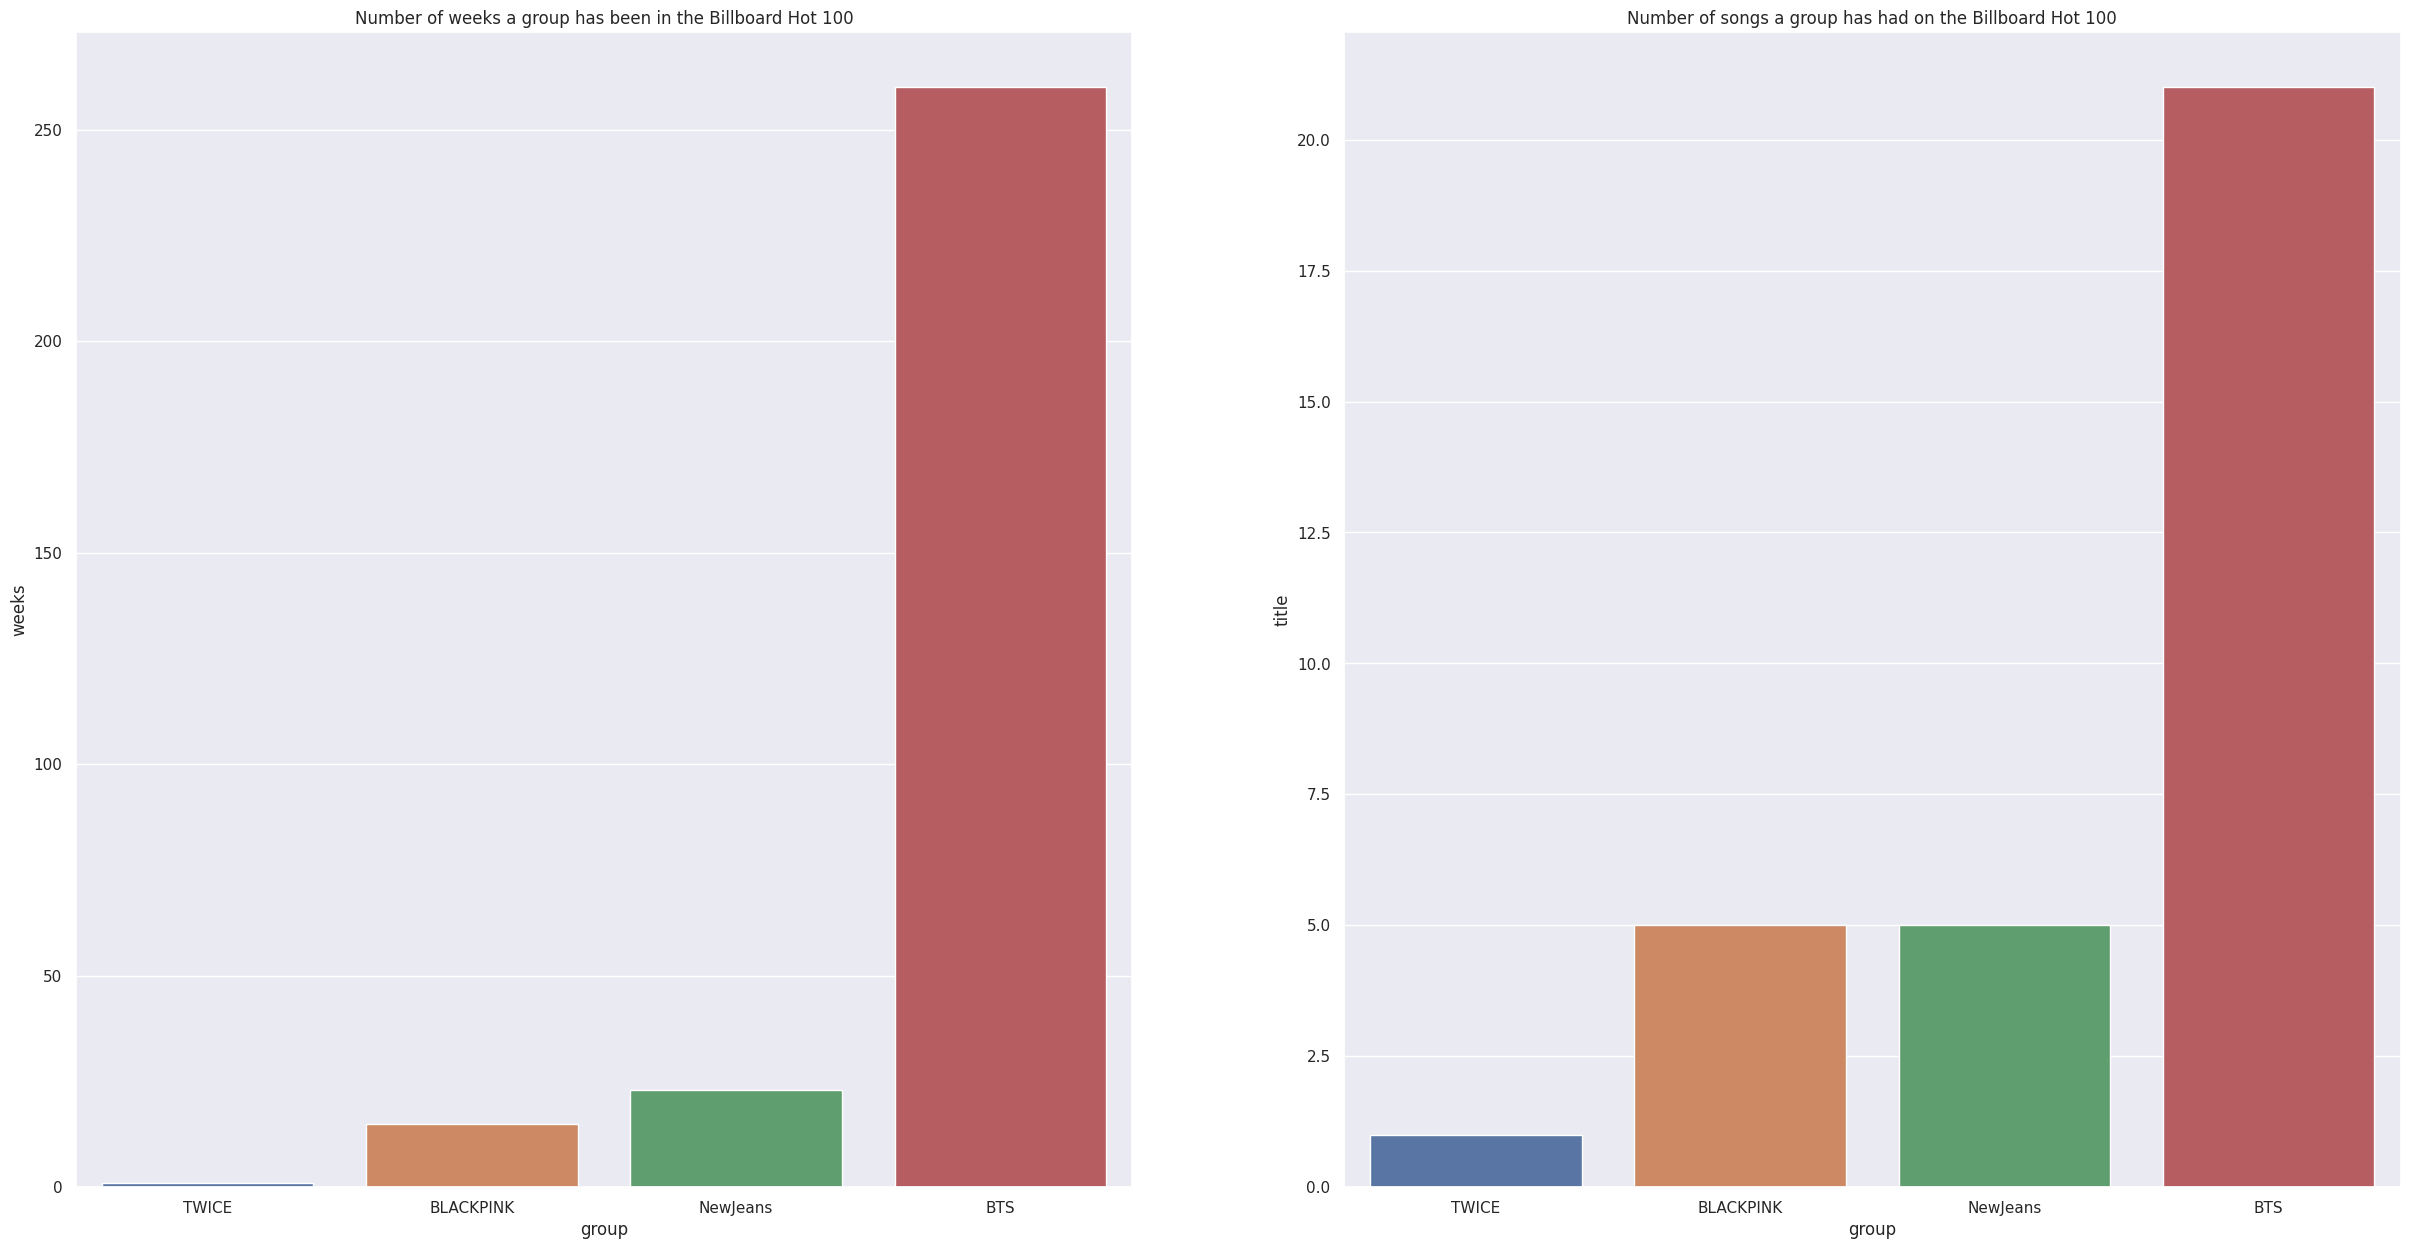

In [12]:
sub_df = pd.concat(group_appearances.values())

_, axes = plt.subplots(1,2)
temp = sub_df.groupby(by="group")["weeks"].sum().reset_index().sort_values(by="weeks")
sns.barplot(
    data=temp,
    x="group",
    y="weeks",
    ax=axes[0]
).set_title("Number of weeks a group has been in the Billboard Hot 100")

temp = sub_df.groupby(by="group")["title"].nunique().reset_index().sort_values(by="title")
sns.barplot(
    data=temp,
    x="group",
    y="title",
    ax=axes[1]
).set_title("Number of songs a group has had on the Billboard Hot 100")